<H1>Pytegorean win percentage</H1>
<p> This notebook has the calculation of a pytegorian win percentage of the 2018 premier league season, the pythagorean win percentage will be used to classified the outcome of the matches. There will be a implementation of Logistic regression using te Stocahastic Gradient Descent to optimize the loss function.
<p>The data used in this notebook was taken from <a>https://www.football-data.co.uk/books.php</a> by joseph buchdahl.The implamentation of the logistic regression model was made based on the information in the WebSite "Real Python" <a>https://realpython.com/gradient-descent-algorithm-python/</a>. The Pythagorean win percentage topic is explained in <a>https://www.coursera.org/learn/prediction-models-sports-data/</a></p>
<ul> Topics
  <li>Stochastic Gradient Descent</li>
  <li>Logistic Regression</li>
  <li>Loss Function</li></ul>

<H2>Welcome!!!</H2>


Import Main libraries

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix

##Load the dataset
2018 English Premier League Season

In [71]:
!git clone https://github.com/Hardila-data/Premier_L.git

Cloning into 'Premier_L'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


Dataframe the English Premeir League 2018 season.

In [72]:
url = 'Premier_L/Premier_League_2018.csv'
df1 = pd.read_csv(url)
df1.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


Add new column to the dataframe to count the number of games.

In [73]:
df1['cnt'] = 1

Making a selection of the columns that are important to obtained the pythagorean win percentage and predict the final outcome.

In [74]:
columns_matters = ['Date', 'HomeTeam','AwayTeam','FTHG'	,'FTAG'	,'FTR','cnt']

In [75]:
df_new = df1[columns_matters]
df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,cnt
0,10/08/2018,Man United,Leicester,2,1,H,1
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1
2,11/08/2018,Fulham,Crystal Palace,0,2,A,1
3,11/08/2018,Huddersfield,Chelsea,0,3,A,1
4,11/08/2018,Newcastle,Tottenham,1,2,A,1


According to the final outcome of the games there will be give 1 to the winner, 0.5 in a draw case and 0 to the losser.

In [76]:
df_new = df_new.assign(home_winvalue_2018 = np.where(df_new['FTR']=='H',1,np.where(df_new['FTR']=='D',.5,0)))
df_new = df_new.assign(away_winvalue_2018 = np.where(df_new['FTR']=='A',1,np.where(df_new['FTR']=='D',.5,0)))
df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,cnt,home_winvalue_2018,away_winvalue_2018
0,10/08/2018,Man United,Leicester,2,1,H,1,1.0,0.0
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,1.0,0.0
2,11/08/2018,Fulham,Crystal Palace,0,2,A,1,0.0,1.0
3,11/08/2018,Huddersfield,Chelsea,0,3,A,1,0.0,1.0
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,0.0,1.0


To convert the categorical feature FTR into numerical it will use np.get_dummyes. Three new columns are generated. 
<p> FTR_A = Away winner as final outcome.
<p> FTR_D	= Draw as a final outcome.
<p> FTR_H = Home winner as a fina outcome.

In [77]:
df_new = pd.get_dummies(data=df_new,columns=['FTR'])
df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,cnt,home_winvalue_2018,away_winvalue_2018,FTR_A,FTR_D,FTR_H
0,10/08/2018,Man United,Leicester,2,1,1,1.0,0.0,0,0,1
1,11/08/2018,Bournemouth,Cardiff,2,0,1,1.0,0.0,0,0,1
2,11/08/2018,Fulham,Crystal Palace,0,2,1,0.0,1.0,1,0,0
3,11/08/2018,Huddersfield,Chelsea,0,3,1,0.0,1.0,1,0,0
4,11/08/2018,Newcastle,Tottenham,1,2,1,0.0,1.0,1,0,0


Create two new dataframes by HomeTeam and Away Team.
<p>HomeTeam Dataframe</p>

In [78]:
df_home = df_new[['HomeTeam','FTHG','FTAG','cnt','home_winvalue_2018'	,'away_winvalue_2018','FTR_H']]
df_home = df_home.rename(columns={'HomeTeam':'team', 'FTHG':'GOL_FOR', 'FTAG':'GOL_AG', 'FTR_H':'win_lose'})
df_home.head()

,team,GOL_FOR,GOL_AG,cnt,home_winvalue_2018,away_winvalue_2018,win_lose
0,Man United,2,1,1,1.0,0.0,1
1,Bournemouth,2,0,1,1.0,0.0,1
2,Fulham,0,2,1,0.0,1.0,0
3,Huddersfield,0,3,1,0.0,1.0,0
4,Newcastle,1,2,1,0.0,1.0,0


AwayTeam dataframe

In [79]:
df_away = df_new[['AwayTeam','FTAG','FTHG','cnt','home_winvalue_2018'	,'away_winvalue_2018','FTR_A']]
df_away = df_away.rename(columns={'AwayTeam':'team', 'FTAG':'GOL_FOR','FTHG':'GOL_AG', 'FTR_A':'win_lose'})
df_away.head()

,team,GOL_FOR,GOL_AG,cnt,home_winvalue_2018,away_winvalue_2018,win_lose
0,Leicester,1,2,1,1.0,0.0,0
1,Cardiff,0,2,1,1.0,0.0,0
2,Crystal Palace,2,0,1,0.0,1.0,1
3,Chelsea,3,0,1,0.0,1.0,1
4,Tottenham,2,1,1,0.0,1.0,1


It is time to concat the Away dataframe and the Home dataframe to create a new dataframe with goals for and goals against

In [80]:
english_df = pd.concat([df_home, df_away]).sort_values(by='team')
english_df.head()

,team,GOL_FOR,GOL_AG,cnt,home_winvalue_2018,away_winvalue_2018,win_lose
323,Arsenal,0,1,1,1.0,0.0,0
200,Arsenal,4,1,1,1.0,0.0,1
147,Arsenal,2,2,1,0.5,0.5,0
248,Arsenal,1,3,1,1.0,0.0,0
371,Arsenal,3,1,1,0.0,1.0,1


It is time to determine the pythagorean win percentage.
<p>First, it will be calculated the cumulative gol.

In [81]:
english_df['cumGF'] = english_df.groupby(['team'])['GOL_FOR'].apply(lambda x: x.cumsum())
english_df['cumGA'] = english_df.groupby(['team'])['GOL_AG'].apply(lambda x: x.cumsum())
english_df

,team,GOL_FOR,GOL_AG,cnt,home_winvalue_2018,away_winvalue_2018,win_lose,cumGF,cumGA
323,Arsenal,0,1,1,1.0,0.0,0,0,1
200,Arsenal,4,1,1,1.0,0.0,1,4,2
147,Arsenal,2,2,1,0.5,0.5,0,6,4
248,Arsenal,1,3,1,1.0,0.0,0,7,7
371,Arsenal,3,1,1,0.0,1.0,1,10,8
...,...,...,...,...,...,...,...,...,...
227,Wolves,4,3,1,1.0,0.0,1,43,40
208,Wolves,0,2,1,0.0,1.0,0,43,42
170,Wolves,0,2,1,0.0,1.0,0,43,44
149,Wolves,2,1,1,1.0,0.0,1,45,45


Calculation of Pythagorean win percent.
<p> Pythagorean win percentage = ((cumulative Gol For)**2/((cumulative Gol For)**2 + (cumulative gol Agains)**2)


In [82]:
english_df['pyth_wpct'] = english_df['cumGF']**2/(english_df['cumGF']**2+english_df['cumGA']**2)
english_df.head()

,team,GOL_FOR,GOL_AG,cnt,home_winvalue_2018,away_winvalue_2018,win_lose,cumGF,cumGA,pyth_wpct
323,Arsenal,0,1,1,1.0,0.0,0,0,1,0.000000
200,Arsenal,4,1,1,1.0,0.0,1,4,2,0.800000
147,Arsenal,2,2,1,0.5,0.5,0,6,4,0.692308
248,Arsenal,1,3,1,1.0,0.0,0,7,7,0.500000
371,Arsenal,3,1,1,0.0,1.0,1,10,8,0.609756


To predict victory or defeat, as a result, the draws will be removed from the dataset.

In [83]:
#Remove draws
english_removed_draw_df = english_df.loc[english_df.home_winvalue_2018!=0.5].copy()
english_removed_draw_df.head()

,team,GOL_FOR,GOL_AG,cnt,home_winvalue_2018,away_winvalue_2018,win_lose,cumGF,cumGA,pyth_wpct
323,Arsenal,0,1,1,1.0,0.0,0,0,1,0.000000
200,Arsenal,4,1,1,1.0,0.0,1,4,2,0.800000
248,Arsenal,1,3,1,1.0,0.0,0,7,7,0.500000
371,Arsenal,3,1,1,0.0,1.0,1,10,8,0.609756
342,Arsenal,2,3,1,0.0,1.0,0,12,11,0.543396


Let's implement the logistic regression to predict the outcomes according to the pythagorean win percentage. 

First, determine X,y to the logistic Model

In [84]:
X =  english_removed_draw_df.pyth_wpct.to_numpy()
y = english_removed_draw_df.win_lose.to_numpy()

Second, the loss function that will be implemented is the Ordinary Least Squares. To optimize with this loss function is not necesary to find the gradient, tensorflow library will do all the job.

In [85]:
import tensorflow as tf

#Stochastic Gradient Descent 
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
#Weights to optimize in the equation.
var = tf.Variable([0.3])
var1 = tf.Variable([0.3])

expo = (-1*(var + (var1*X)))
#Logistic Function
log_func = 1/(1+(tf.math.exp(expo)))
#Cost function
cost = lambda : ((1/(1+(tf.math.exp(-1*(var + (var1 * X ))))))-y)**2 


#Optimization
for _ in range(20):
  sgd.minimize(cost,  var_list=[var,var1])

predict =  1/(1+tf.math.exp(-1*(var+var1*X)))

#Become de predictions to final outcomes.
y_pred = [1 if pred > 0.5 else 0 for pred in predict]
print(f'Some of the final results calculated : {y_pred[:5]}')

Some of the final results calculated : [0, 1, 1, 1, 1]


Plotting the logistic regression results.

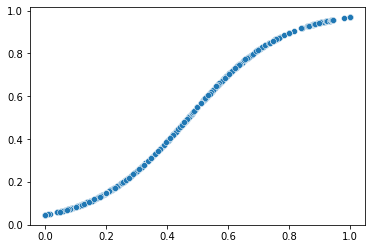

In [86]:
sns.scatterplot(x=X, y=predict)

Finally, the confustion matrix helps us to calculate the percentage of the correct classified results.

In [87]:
True_victories,False_victories,False_losses,True_losses, = confusion_matrix(y, y_pred).ravel()
print(f'Predicted as :\nTrue victories : {True_victories}\nFalse victories: {False_victories}\nTrue losses: {True_losses}\nFalse Losses: {False_losses}' )
print(f'Percentage true corrected classified : {(True_victories+True_losses)/(True_victories+True_losses+False_victories+False_losses)*100}%')


Predicted as :
True victories : 223
False victories: 86
True losses: 212
False Losses: 97
Percentage true corrected classified : 70.3883495145631%


<p> The logistic regression classifier was train with all the data available, the next step is to evaluate with next matches that are not able in the data to see, actually, how well is the perfomance of the model.<p>
<p>Modified the learning rate is a great exercise to see how the above plot and the predictions change<p>
<H3>Thanks!!</H3>
